In [1]:
## Observations and Insights 

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
df=pd.merge(study_results,mouse_metadata,how="outer",on='Mouse ID')


# Display the data table for preview
df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
no_of_mice=df["Mouse ID"].count()
no_of_mice




1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicateRowsDF =df[df.duplicated(['Mouse ID','Timepoint'])]
duplicateRowsDF







,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
df.loc[df["Mouse ID"]== 'g989']




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=df.drop(df.index[[861, 863, 865, 867, 869]])
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the clean DataFrame.

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1888 non-null   object 
 1   Timepoint           1888 non-null   int64  
 2   Tumor Volume (mm3)  1888 non-null   float64
 3   Metastatic Sites    1888 non-null   int64  
 4   Drug Regimen        1888 non-null   object 
 5   Sex                 1888 non-null   object 
 6   Age_months          1888 non-null   int64  
 7   Weight (g)          1888 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.8+ KB


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor
#volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_obj=clean_df.groupby("Drug Regimen")

drug_mean= regimen_obj["Tumor Volume (mm3)"].mean()
drug_median= regimen_obj["Tumor Volume (mm3)"].median()

drug_var= regimen_obj["Tumor Volume (mm3)"].var()
drug_std= regimen_obj["Tumor Volume (mm3)"].std()
drug_sem= regimen_obj["Tumor Volume (mm3)"].sem()

tumor_regimen_df=pd.DataFrame({"Mean": drug_mean,
                              "Median": drug_median,
                               "Variamce": drug_var,
                              "Standard Dev":drug_std,
                              "SEM":drug_sem})
tumor_regimen_df





,Mean,Median,Variamce,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
regimen_obj1=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
#Summary statistics table
regimen_obj1

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Mice count per drug')

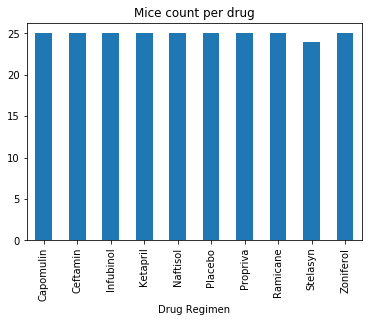

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
mice_per_regimen=clean_df.groupby("Drug Regimen")["Mouse ID"].nunique()

mice_chart=mice_per_regimen.plot(kind ="bar")

mice_chart.set_title("Mice count per drug")


# mice_chart.set_xlabel("No of Mice")
# plt.show()
# plt.tight_layout()







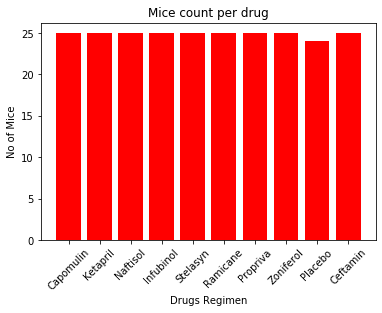

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drugs=clean_df["Drug Regimen"].unique()
x_axis=np.arange(len(drugs))


plt.bar(x_axis,mice_per_regimen,color='red',align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,labels=drugs,rotation='45')
plt.title("Mice count per drug")

plt.xlabel("Drugs Regimen")
plt.ylabel("No of Mice")
plt.show()
plt.tight_layout()



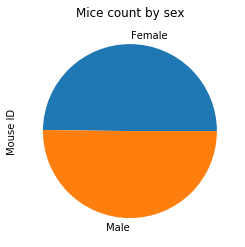

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


mice_by_gender=clean_df.groupby("Sex")["Mouse ID"].nunique()



mice_by_gender_plot=mice_by_gender.plot(kind='pie')
mice_by_gender_plot.set_title("Mice count by sex")
mice_by_gender_plot.set


plt.show()







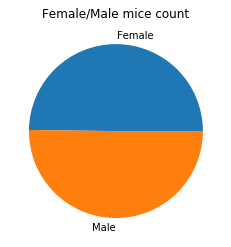

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender=clean_df["Sex"].unique()

plt.pie(mice_by_gender,labels=gender)


plt.title("Female/Male mice count")


plt.show()
plt.tight_layout()






## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#new_df=clean_df.loc[:,"Drug Regimen" == ["Capomulin","Ramicane","Infubinol","Ceftamin"]]


# Start by getting the last (greatest) timepoint for each mouse
mice=clean_df.groupby(["Mouse ID"])

max=mice.max() #max timepoint per mice
 #datframe with max timepoint per mice
max.reset_index()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,45.000000,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_df=pd.merge(mouse_metadata,max,on='Mouse ID')
new_df

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y
0,k403,Ramicane,Male,21,16,45,45.000000,1,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17,45,45.000000,1,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15,45,45.473753,0,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17,45,45.000000,1,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16,45,45.851531,1,Ramicane,Male,11,16
...,...,...,...,...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26,10,48.710661,0,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25,45,62.754451,3,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29,45,65.741070,3,Naftisol,Female,13,29


In [17]:

merged_df=new_df.drop(columns=['Drug Regimen_y','Sex_y','Age_months_y','Weight (g)_y'])

merged_df.head()

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,45.000000,1
1,s185,Capomulin,Female,3,17,45,45.000000,1
2,x401,Capomulin,Female,16,15,45,45.473753,0
3,m601,Capomulin,Male,22,17,45,45.000000,1
4,g791,Ramicane,Male,11,16,45,45.851531,1


In [19]:
#merged_df["Drug Regimen_x"]

merged_df.drop(merged_df[merged_df['Drug Regimen_x']=='Placebo'].index,inplace=True)
merged_df.drop(merged_df[merged_df['Drug Regimen_x']=='Stelasyn'].index,inplace=True) 
merged_df.drop(merged_df[merged_df['Drug Regimen_x']=='Zoniferol'].index,inplace=True)
merged_df.drop(merged_df[merged_df['Drug Regimen_x']=='Ketapril'].index,inplace=True)
merged_df.drop(merged_df[merged_df['Drug Regimen_x']=='Propriva'].index,inplace=True)
merged_df.drop(merged_df[merged_df['Drug Regimen_x']=='Naftisol'].index,inplace=True)
merged_df

#'Stelasyn'| 'Zoniferol'| 'Ketapril'| 'Propriva'| 'Naftisol'))

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,45.000000,1
1,s185,Capomulin,Female,3,17,45,45.000000,1
2,x401,Capomulin,Female,16,15,45,45.473753,0
3,m601,Capomulin,Male,22,17,45,45.000000,1
4,g791,Ramicane,Male,11,16,45,45.851531,1
...,...,...,...,...,...,...,...,...
235,x822,Ceftamin,Male,3,29,45,61.386660,3
237,y163,Infubinol,Female,17,27,45,67.685569,3
241,y769,Ceftamin,Female,6,27,45,68.594745,4
242,y865,Ceftamin,Male,23,26,45,64.729837,3


In [32]:


# Put treatments into a list for for loop (and later for plot labels)
treatments=merged_df["Drug Regimen_x"].unique()
treatments


# # Create empty list to fill with tumor vol data (for plotting)
vol=[]



# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles =merged_df ['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of ofinal tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {quartiles[0.5]} ")

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    
    
# Determine outliers using upper and lower bounds


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_volume = merged_df.loc[(merged_df['Tumor Volume (mm3)'] < lower_bound) | (merged_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_volume
    

The lower quartile of final tumor volume is: 45.5098442875
The upper quartile of final tumor volume is: 59.930261755000004
The interquartile range of ofinal tumor volume is: 14.420417467500002
The the median of final tumor volume is: 46.860058175 
Values below 23.87921808625 could be outliers.
Values above 81.56088795625001 could be outliers.


,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3),Metastatic Sites


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
